<a href="https://colab.research.google.com/github/AnnCherk/Introduction-to-ML/blob/main/Intro%2BPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Упражнение 7. Введение в машинное обучение


In [1]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("data-1696535354982.csv", delimiter=",", header=0)
df=df[df.region_name != "Республика Северная Осетия-Алания"]
df=df[df.region_name != "Томская область"]
df=df[df.region_name != "Ивановская область"]
print(df)

              region_name  salary
0          Алтайский край   25960
1        Амурская область   43156
2   Архангельская область   47526
3    Астраханская область   32166
4    Белгородская область   31163
..                    ...     ...
80   Чеченская Республика   26108
81   Чувашская Республика   27028
82           Чукотский АО   96930
83      Ямало-Ненецкий АО   86560
84    Ярославская область   33882

[82 rows x 2 columns]


In [ ]:
sample = df.salary.to_numpy ()
sample=np.sort(sample)
print(sample[11])
print(sample[18])
print(sample[58])

In [ ]:
round(np.mean(sample),2)

In [ ]:
round(np.median(sample),2)

# Упражнение 8. PCA

In [79]:
from sklearn.decomposition import PCA
import pandas as pd

data = pd.read_csv("7_25.csv", delimiter=",", header=None)

pca = PCA(n_components=2, svd_solver='full')

X=pca.fit_transform(data)

print(len(data))
print(round(pca.fit_transform(data)[0,0], 3))
print(round(pca.fit_transform(data)[0,1], 3))

60
-32.314
-4.261


In [74]:
explained_variance_ratio = pca.explained_variance_ratio_[:2]

total_explained_variance = sum(explained_variance_ratio)

print(round(total_explained_variance, 3))

0.69


In [82]:
cumulative_variance_ratio = pca.explained_variance_ratio_.sum()

min_components = (cumulative_variance_ratio > 0.85).argmax() + 1

print("Минимальное количество главных компонент для доли объясненной дисперсии более 0.85:", min_components)

Минимальное количество главных компонент для доли объясненной дисперсии более 0.85: 1


<ipython-input-76-f061ddc96cdf>:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pca_result[:, 0], pca_result[:, 1], edgecolors='k', cmap='viridis', s=50)


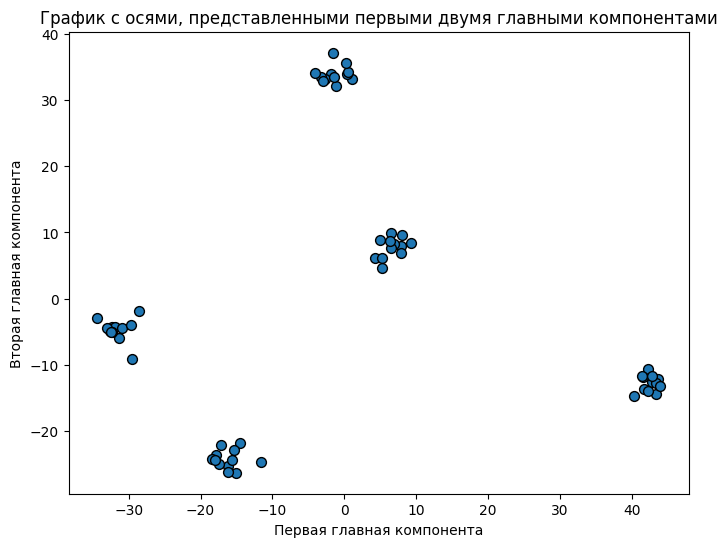

In [76]:
import matplotlib.pyplot as plt

pca = PCA(svd_solver='full', n_components=2)
pca_result = pca.fit_transform(data)

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], edgecolors='k', cmap='viridis', s=50)
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.title('График с осями, представленными первыми двумя главными компонентами')
plt.show()

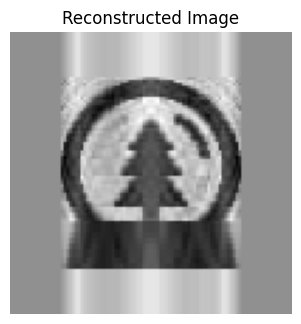

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

loadings = pd.read_csv("X_loadings_401.csv", header=None, delimiter=';')
reduced_data = pd.read_csv("X_reduced_401.csv", header=None, delimiter=';')

loadings = loadings.applymap(lambda x: float(x.replace(',', '.')) if isinstance(x, str) else x)
reduced_data = reduced_data.applymap(lambda x: float(x.replace(',', '.')) if isinstance(x, str) else x)

# восстановление изображения
reconstructed_data = np.dot(reduced_data.values, loadings.values.T)

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_data, cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')

plt.show()